In [4]:
import grape 

In [5]:
# if monarch-kg.tar.gz is not in the current directory, download it
import os
if not os.path.exists('monarch-kg.tar.gz'):
        !wget https://data.monarchinitiative.org/monarch-kg/2024-02-13/monarch-kg.tar.gz
if not os.path.exists('monarch-kg_edges.tsv') or not os.path.exists('monarch-kg_nodes.tsv'):
        !tar -xvzf monarch-kg.tar.gz

--2024-02-28 14:01:02--  https://data.monarchinitiative.org/monarch-kg/2024-02-13/monarch-kg.tar.gz
Resolving data.monarchinitiative.org (data.monarchinitiative.org)... 35.208.191.193
Connecting to data.monarchinitiative.org (data.monarchinitiative.org)|35.208.191.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145713446 (139M) [application/x-tar]
Saving to: ‘monarch-kg.tar.gz.2’

monarch-kg.tar.gz.2 100%[===================>] 138.96M  16.6MB/s    in 9.3s    

2024-02-28 14:01:12 (15.0 MB/s) - ‘monarch-kg.tar.gz.2’ saved [145713446/145713446]

x monarch-kg_nodes.tsv
x monarch-kg_edges.tsv


In [6]:
from grape import Graph
g = Graph.from_csv(
        edge_path="monarch-kg_edges.tsv",
        node_path="monarch-kg_nodes.tsv",
        node_list_separator="\t",
        edge_list_separator="\t",
        node_list_header=True,  # Always true for KG-Hub KGs
        edge_list_header=True,  # Always true for KG-Hub KGs
        nodes_column='id',  # Always true for KG-Hub KGs
        node_list_node_types_column='category',  # Always true for KG-Hub KGs
        node_types_separator='|',
        sources_column='subject',  # Always true for KG-Hub KGs
        destinations_column='object',  # Always true for KG-Hub KGs
        edge_list_edge_types_column='predicate',
        directed=False,
        name='Monarch KG Feb 2024',
        verbose=True
)
g

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>Monarch KG Feb 2024</h2><p class="paragraph">The undirected multigraph Monarch KG Feb 2024 has 870.28K heterogeneous nodes and 7.39M heterogeneous edges. The graph contains 340.22K connected components (of which 339.98K are disconnected nodes), with the largest one containing 525.39K nodes and the smallest one containing a single node. The RAM requirements for the nodes and edges data structures are 91.56MB and 66.02MB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 0, the maximum node degree is 50.32K, the mode degree is 0, the mean degree is 16.97 and the node degree median is 2.</p><p class="paragraph">The nodes with the highest degree centrality are <a href='http://amigo.geneontology.org/amigo/term/GO:0005634' target='_blank' title='Go to Gene Ontology to get more informations about GO:0005634'>GO:0005634</a> (degree 50.32K and node type <a href='https://biolink.github.io/biolink-model/docs/CellularComponent.html' target='_blank' title='Go to BioLink to get more informations about biolink:CellularComponent'>biolink:CellularComponent</a>), <a href='http://amigo.geneontology.org/amigo/term/GO:0005737' target='_blank' title='Go to Gene Ontology to get more informations about GO:0005737'>GO:0005737</a> (degree 43.52K and node type <a href='https://biolink.github.io/biolink-model/docs/CellularComponent.html' target='_blank' title='Go to BioLink to get more informations about biolink:CellularComponent'>biolink:CellularComponent</a>), <a href='http://amigo.geneontology.org/amigo/term/GO:0016020' target='_blank' title='Go to Gene Ontology to get more informations about GO:0016020'>GO:0016020</a> (degree 37.79K and node type <a href='https://biolink.github.io/biolink-model/docs/CellularComponent.html' target='_blank' title='Go to BioLink to get more informations about biolink:CellularComponent'>biolink:CellularComponent</a>), <a href='http://amigo.geneontology.org/amigo/term/GO:0005886' target='_blank' title='Go to Gene Ontology to get more informations about GO:0005886'>GO:0005886</a> (degree 31.45K and node type <a href='https://biolink.github.io/biolink-model/docs/CellularComponent.html' target='_blank' title='Go to BioLink to get more informations about biolink:CellularComponent'>biolink:CellularComponent</a>) and <a href='http://amigo.geneontology.org/amigo/term/GO:0005829' target='_blank' title='Go to Gene Ontology to get more informations about GO:0005829'>GO:0005829</a> (degree 26.14K and node type <a href='https://biolink.github.io/biolink-model/docs/CellularComponent.html' target='_blank' title='Go to BioLink to get more informations about biolink:CellularComponent'>biolink:CellularComponent</a>).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 80 node types, of which the 10 most common are <a href='https://biolink.github.io/biolink-model/docs/Gene.html' target='_blank' title='Go to BioLink to get more informations about biolink:Gene'>biolink:Gene</a> (5

### Get main component

In [7]:
mc = g.remove_components(top_k_components=1)
mc

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>Monarch KG Feb 2024</h2><p class="paragraph">The undirected multigraph Monarch KG Feb 2024 has 525.39K heterogeneous nodes and 7.35M heterogeneous edges. The graph is connected, that is, it is composed of a single connected component that includes all nodes and edges. The RAM requirements for the nodes and edges data structures are 61.27MB and 62.95MB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 1, the maximum node degree is 50.32K, the mode degree is 2, the mean degree is 27.96 and the node degree median is 7.</p><p class="paragraph">The nodes with the highest degree centrality are <a href='http://amigo.geneontology.org/amigo/term/GO:0005634' target='_blank' title='Go to Gene Ontology to get more informations about GO:0005634'>GO:0005634</a> (degree 50.32K and node type <a href='https://biolink.github.io/biolink-model/docs/CellularComponent.html' target='_blank' title='Go to BioLink to get more informations about biolink:CellularComponent'>biolink:CellularComponent</a>), <a href='http://amigo.geneontology.org/amigo/term/GO:0005737' target='_blank' title='Go to Gene Ontology to get more informations about GO:0005737'>GO:0005737</a> (degree 43.52K and node type <a href='https://biolink.github.io/biolink-model/docs/CellularComponent.html' target='_blank' title='Go to BioLink to get more informations about biolink:CellularComponent'>biolink:CellularComponent</a>), <a href='http://amigo.geneontology.org/amigo/term/GO:0016020' target='_blank' title='Go to Gene Ontology to get more informations about GO:0016020'>GO:0016020</a> (degree 37.79K and node type <a href='https://biolink.github.io/biolink-model/docs/CellularComponent.html' target='_blank' title='Go to BioLink to get more informations about biolink:CellularComponent'>biolink:CellularComponent</a>), <a href='http://amigo.geneontology.org/amigo/term/GO:0005886' target='_blank' title='Go to Gene Ontology to get more informations about GO:0005886'>GO:0005886</a> (degree 31.45K and node type <a href='https://biolink.github.io/biolink-model/docs/CellularComponent.html' target='_blank' title='Go to BioLink to get more informations about biolink:CellularComponent'>biolink:CellularComponent</a>) and <a href='http://amigo.geneontology.org/amigo/term/GO:0005829' target='_blank' title='Go to Gene Ontology to get more informations about GO:0005829'>GO:0005829</a> (degree 26.14K and node type <a href='https://biolink.github.io/biolink-model/docs/CellularComponent.html' target='_blank' title='Go to BioLink to get more informations about biolink:CellularComponent'>biolink:CellularComponent</a>).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 33 node types, of which the 10 most common are <a href='https://biolink.github.io/biolink-model/docs/Gene.html' target='_blank' title='Go to BioLink to get more informations about biolink:Gene'>biolink:Gene</a> (240.05K nodes, 45.69%), <a href='https://biolink.github.io/biolink-mod

### Make LINE embeddings and visualize

In [10]:
from grape.embedders import FirstOrderLINEEnsmallen
line_embedding = FirstOrderLINEEnsmallen().fit_transform(mc)
# write out the embeddings
line_embedding.to_csv('line_embedding.csv.gz', compression='gzip')

/Users/jtr4v/PythonProject/embed_monarch/.venv/lib/python3.11/site-packages/pydantic/_internal/_config.py:322: UserWarning: Valid config keys have changed in V2:
* 'underscore_attrs_are_private' has been removed
  warnings.warn(message, UserWarning)


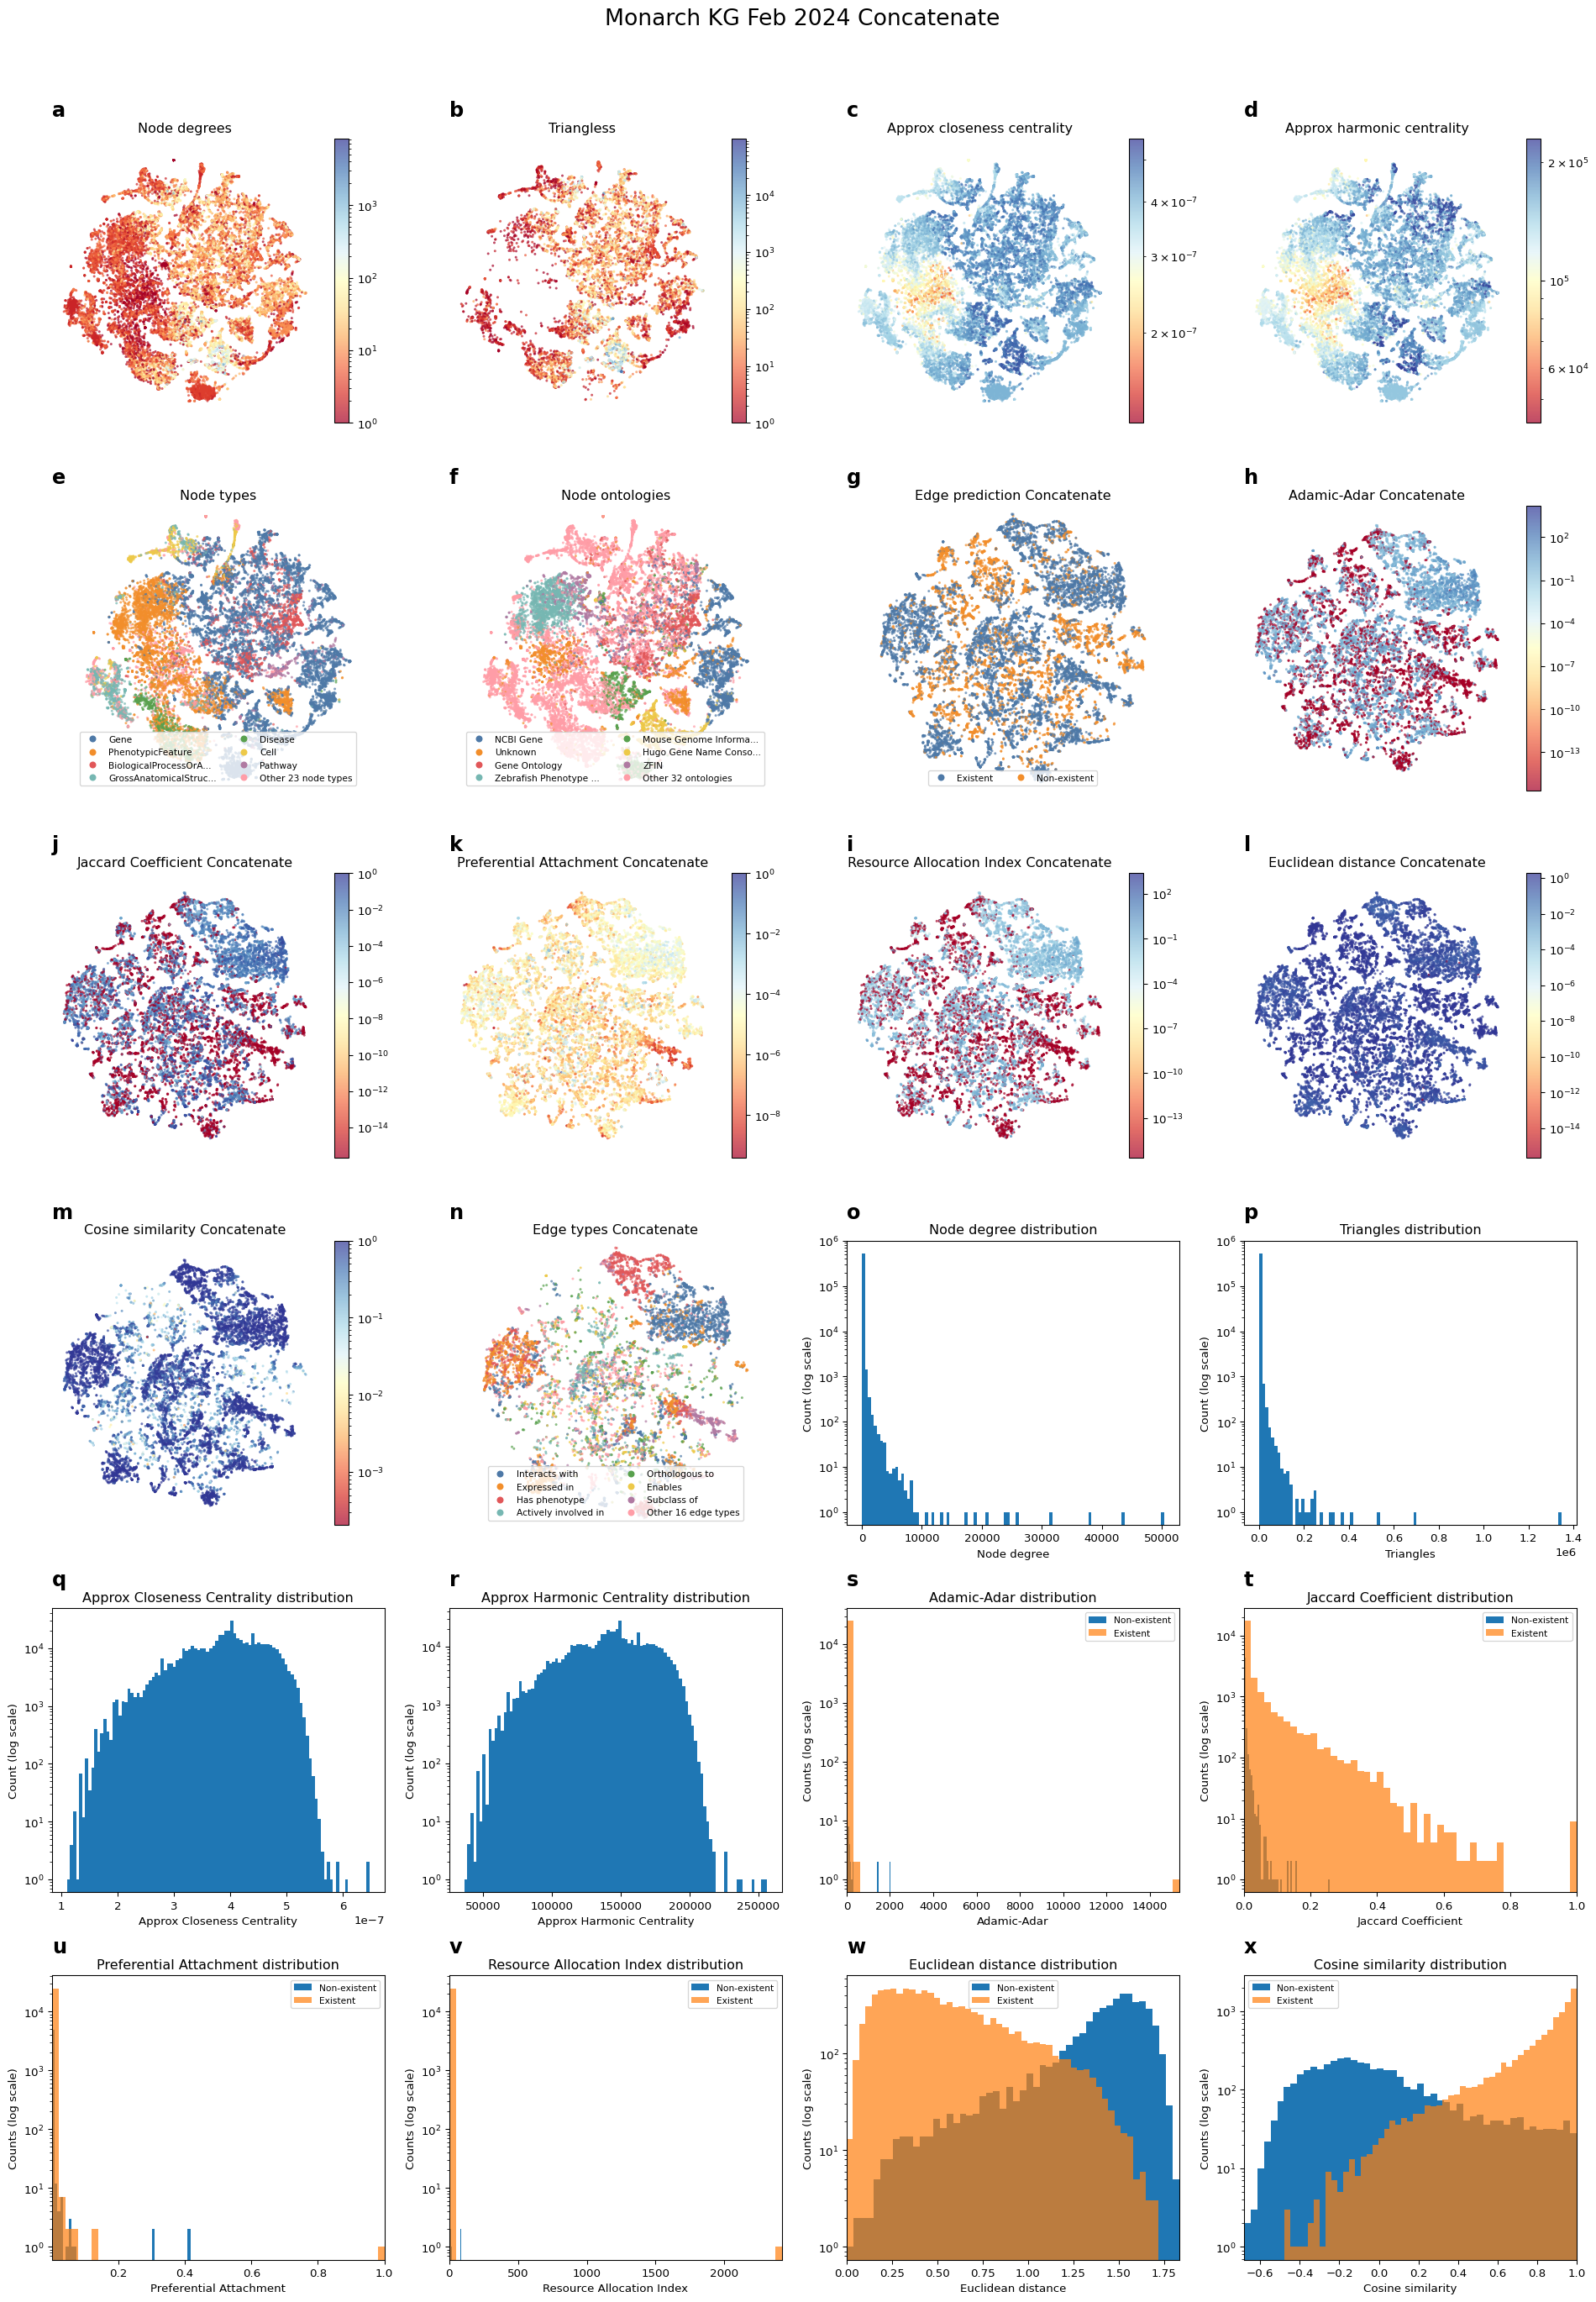

In [13]:
from grape import GraphVisualizer
GraphVisualizer(mc).fit_and_plot_all(line_embedding)

In [ ]:
from grape.embedders import DeepWalkSkipGramEnsmallen
deepwalk_embedding = DeepWalkSkipGramEnsmallen().fit_transform(mc)
# write out the embeddings
deepwalk_embedding.to_csv('deepwalk_embedding.csv.gz', compression='gzip')

In [ ]:
from grape import GraphVisualizer
GraphVisualizer(mc).fit_transform(deepwalk_embedding)